## Linear regression example

# Dataset: Yacht Hydrodynamics Data Set

Attribute Information:

Variations concern hull geometry coefficients and the Froude number:

1. Longitudinal position of the center of buoyancy, adimensional.
2. Prismatic coefficient, adimensional.
3. Length-displacement ratio, adimensional.
4. Beam-draught ratio, adimensional.
5. Length-beam ratio, adimensional.
6. Froude number, adimensional.

The measured variable is the residuary resistance per unit weight of displacement:

7. Residuary resistance per unit weight of displacement, adimensional.

In [1]:
import pandas as pd
import numpy as np

In [32]:
df = pd.read_csv(
  'https://archive.ics.uci.edu/ml/machine-learning-databases/00243/yacht_hydrodynamics.data',
  header=None,
  delim_whitespace=True
  )

df.columns = ['LP', 'PC', 'LDR', 'BDR', 'LBR', 'FN', 'RR']
df.tail()

,LP,PC,LDR,BDR,LBR,FN,RR
303,-2.3,0.6,4.34,4.23,2.73,0.350,8.47
304,-2.3,0.6,4.34,4.23,2.73,0.375,12.27
305,-2.3,0.6,4.34,4.23,2.73,0.400,19.59
306,-2.3,0.6,4.34,4.23,2.73,0.425,30.48
307,-2.3,0.6,4.34,4.23,2.73,0.450,46.66


In [33]:
df.info()
df.describe()
df.dropna()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LP      308 non-null    float64
 1   PC      308 non-null    float64
 2   LDR     308 non-null    float64
 3   BDR     308 non-null    float64
 4   LBR     308 non-null    float64
 5   FN      308 non-null    float64
 6   RR      308 non-null    float64
dtypes: float64(7)
memory usage: 17.0 KB


(308, 7)

In [34]:
from sklearn import preprocessing

In [35]:
from sklearn.preprocessing import MaxAbsScaler
input_data_scaled_df = df.copy()
scaler = MaxAbsScaler()
input_data_scaled = scaler.fit_transform(df)
input_data_scaled_df.loc[:,:] = input_data_scaled
scaler_params = scaler.get_params()
# We are dealing with physics here, hence we need the unscaled values
extract_scaling_function = np.ones((1,input_data_scaled_df.shape[1]))
extract_scaling_function = scaler.inverse_transform(extract_scaling_function)
input_data_scaled_df.head(3)

,LP,PC,LDR,BDR,LBR,FN,RR
0,-0.46,0.9467,0.93,0.7458,0.8709,0.2778,0.0018
1,-0.46,0.9467,0.93,0.7458,0.8709,0.3333,0.0043
2,-0.46,0.9467,0.93,0.7458,0.8709,0.3889,0.0075


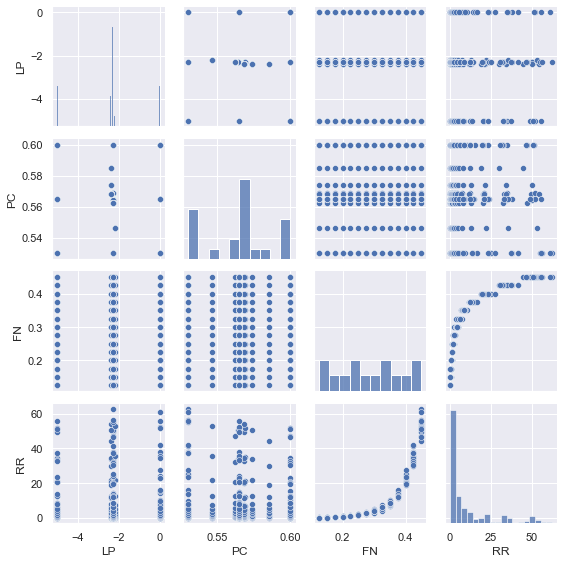

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
cols = ['LP', 'PC', 'FN', 'RR']
sns.pairplot(df[cols], height=2)
plt.tight_layout()
plt.show()

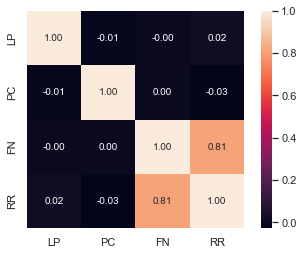

In [37]:
import numpy as np
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',
                 annot_kws={'size': 10},yticklabels=cols, xticklabels=cols)
plt.show()

In [38]:
LP = df.iloc[:, 0].values
#ZN = ZN.reshape(506,1)
print(LP.shape)

PC = df.iloc[:, 1].values
#RM = RM.reshape(506,1)
print(PC.shape)

FN = df.iloc[:, 2].values
#B = B.reshape(506,1)
print(FN.shape)

RR = df.iloc[:, 3].values
#MEDV = MEDV.reshape(506,1)
print(RR.shape)

(308,)
(308,)
(308,)
(308,)


In [39]:
new_dataset = np.zeros((308,4))
new_dataset[:, 0] = LP
new_dataset[:, 1] = PC
new_dataset[:, 2] = FN
new_dataset[:, 3] = RR
print(new_dataset[:5,:])

[[-2.3    0.568  4.78   3.99 ]
 [-2.3    0.568  4.78   3.99 ]
 [-2.3    0.568  4.78   3.99 ]
 [-2.3    0.568  4.78   3.99 ]
 [-2.3    0.568  4.78   3.99 ]]


In [12]:
x_train = new_dataset[0:275, 0:3]
print(x_train[0:5, :])

[[-2.3    0.568  4.78 ]
 [-2.3    0.568  4.78 ]
 [-2.3    0.568  4.78 ]
 [-2.3    0.568  4.78 ]
 [-2.3    0.568  4.78 ]]


In [40]:
y_train = new_dataset[0:275,3]
y_train = y_train.reshape(275,1)
print(y_train[0:5,:])

[[3.99]
 [3.99]
 [3.99]
 [3.99]
 [3.99]]


In [41]:
x_test = new_dataset[275:, 0:3]
print(x_test[0:5, :])

[[-5.    0.53  4.78]
 [-5.    0.53  4.78]
 [-5.    0.53  4.78]
 [-5.    0.53  4.78]
 [-5.    0.53  4.78]]


In [42]:
y_test = new_dataset[275:,3]
y_test = y_test.reshape(33,1)
print(y_test[0:5,:])

[[3.75]
 [3.75]
 [3.75]
 [3.75]
 [3.75]]


In [43]:
# matriz X
x = np.ones((275,4))
x[:,1:] = x_train
print(x[0:5, :])

[[ 1.    -2.3    0.568  4.78 ]
 [ 1.    -2.3    0.568  4.78 ]
 [ 1.    -2.3    0.568  4.78 ]
 [ 1.    -2.3    0.568  4.78 ]
 [ 1.    -2.3    0.568  4.78 ]]


In [44]:
# matriz y
y = y_train

In [45]:
# producto dentro del parentesis
x_prod = np.dot(np.transpose(x),x)

In [46]:
# inversa o pseudoinversa
x_inv = np.linalg.inv(x_prod)
# x_inv = np.linalg.pinv(x_prod)

In [47]:
x_comp = np.dot(x_inv,np.transpose(x))

In [48]:
theta = np.dot(x_comp, y)
print(theta)

[[-6.07270175e+00]
 [ 4.93664746e-03]
 [ 8.42529846e+00]
 [ 1.09892475e+00]]


In [49]:
y_hat_train = -6.072 + 0.00493 * x_train[:,0] + 8.425 * x_train[:,1] + 1.099 * x_train[:,2]
y_hat_train = y_hat_train.reshape(275,1)

In [50]:
y_hat_test = -6.072 + 0.00493 * x_test[:,0] + 8.425  * x_test[:,1] + 1.099 * x_test[:,2]
y_hat_test = y_hat_test.reshape(33,1)

In [51]:
# MSE
sum = 0
for i in range(275):
    sum = sum + (y_train[i, :] - y_hat_train[i, :]) ** 2

mse_train = sum / 275

print(mse_train)

[0.22852423]


In [52]:
sum = 0
for i in range(33):
    sum = sum + (y_test[i, :] - y_hat_test[i, :]) ** 2

mse_test = sum / 33

print(mse_test)

[0.17392536]


In [53]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(y_train, y_hat_train)
print('coef: %.3f' % slr.coef_)
print('Intercept: %.3f' % slr.intercept_)

coef: 0.302
Intercept: 2.734


In [54]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(y_train, y_hat_train)
print('coef: %.3f' % slr.coef_)
print('Intercept: %.3f' % slr.intercept_)

coef: 0.302
Intercept: 2.734


In [55]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
print('coef: ',lr.coef_)
print('Intercept: ', lr.intercept_)

coef:  [[4.93664746e-03 8.42529846e+00 1.09892475e+00]]
Intercept:  [-6.07270175]


In [117]:
theta = np.random.randn(4,1) #y = m*x + b 
theta #theta parameter vector [m,b] which we are trying to optimize

alpha = 0.01 #tweakable
n_steps = 100 #tweakable
m = 275 

grads = []
thetas = []

for step in range(n_steps):
  gradient = (2/m) * x.T.dot((x.dot(theta)-y_train))
  theta = theta - alpha * gradient 
  grads.append(gradient)
  thetas.append(theta)

theta

array([[ 0.10535016],
       [-0.00895612],
       [ 1.39456627],
       [ 0.62706944]])